## Practical 4


**Name:** Suryajiraje Bhosale

**PRN:** 1901202051

**School:** School of Data Science

**Program:** B.Sc. Data Science

**Year/ Sem:** Second Year Semester 3

**Subject Name:** Machine Learning-I

**Subject Code:** DS303

**Aim/Objective:** Demonstration of Linear Regression on Advertising Dataset.

**Apparatus/ Tools/Equipment’s/ Resources used:** Jupyter notebook, Lecture notes, Python and
Machine Learning books, online resources from Google, dataset, Google Meet.

**Concept/Theory of Experiments:**

1. Gain insights about Linear Regression Model.
2. Fitting linear regression model.
3. Predict the values of dependent variable for test data.
4. Calculating the errors of the model.

**Procedure:**

1. Import the given data set in Python editor.
2. Import required modules.
3. Find the summary statistics report.
4. Check whether the outliers are present in the given data set or not using graphical method.
5. Check whether there is some relationship between variables.
6. Data Visualization.
7. Identifying the impact of amount spend for advertising in TV, radio and newspaper variable on the sales.
8. Split the data in Training and testing data.
9. Fit the LinearRegression model with training data.
10. Apply the model on test data.
11. Evaluate the model using matrix.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid')

In [2]:
ds = pd.read_csv('/Users/user/Desktop/ADS.csv')

In [3]:
print("The shape of the Dataset is:", ds.shape)

The shape of the Dataset is: (200, 4)


In [4]:
print("THE FIRST FEW LINES OF THE DATASET ARE:  \n");ds.head()

THE FIRST FEW LINES OF THE DATASET ARE:  



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
print("THE LAST FEW LINES OF THE DATASET ARE:  \n");ds.tail()

THE LAST FEW LINES OF THE DATASET ARE:  



,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
print('THE BASIC INFORMATION OF THE DATASET IS GIVEN BELOW : \n\n');ds.info()


THE BASIC INFORMATION OF THE DATASET IS GIVEN BELOW : 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
print('DESCRIPTION OF THE DATASET:\n');ds.describe()

DESCRIPTION OF THE DATASET:



,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Checking Missing Data (if any) For Imputation:

#### Viz 1

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


<AxesSubplot:>

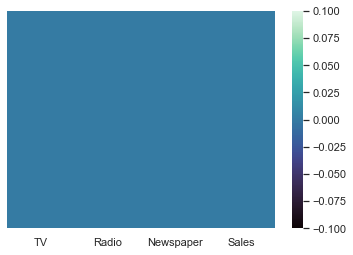

In [8]:
print(ds.isnull().sum())
sns.heatmap(ds.isnull(), yticklabels=False, cbar='True', cmap="mako")

#### Conlcusion

There are zero null values. There is no need for data cleaning. 

## Identifying relevant colums for further EDA:

In [9]:
print(ds.columns)
dsc = ds.columns[1:4]
print(dsc)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
Index(['Radio', 'Newspaper', 'Sales'], dtype='object')


#### Viz 2

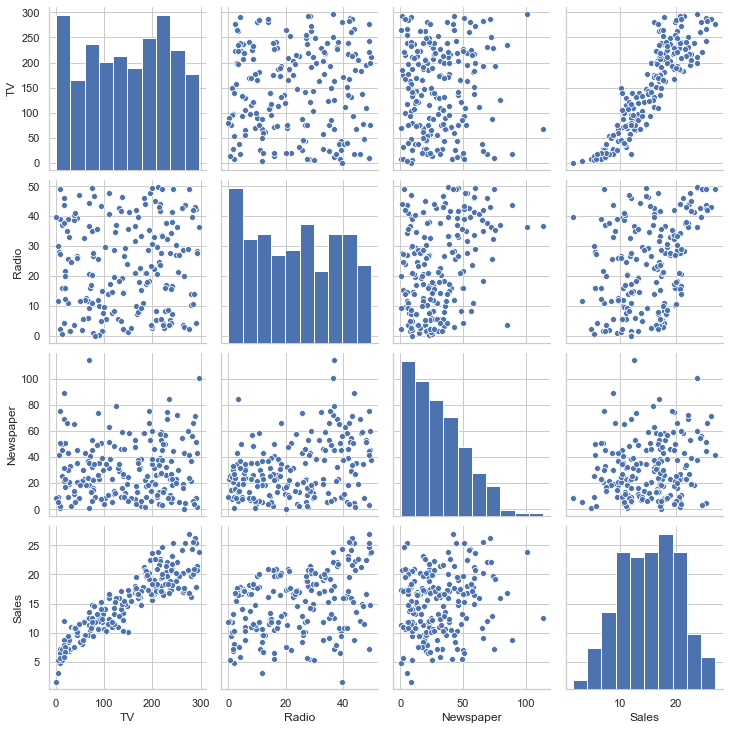

In [10]:
sns.pairplot(ds)

#### Viz 3

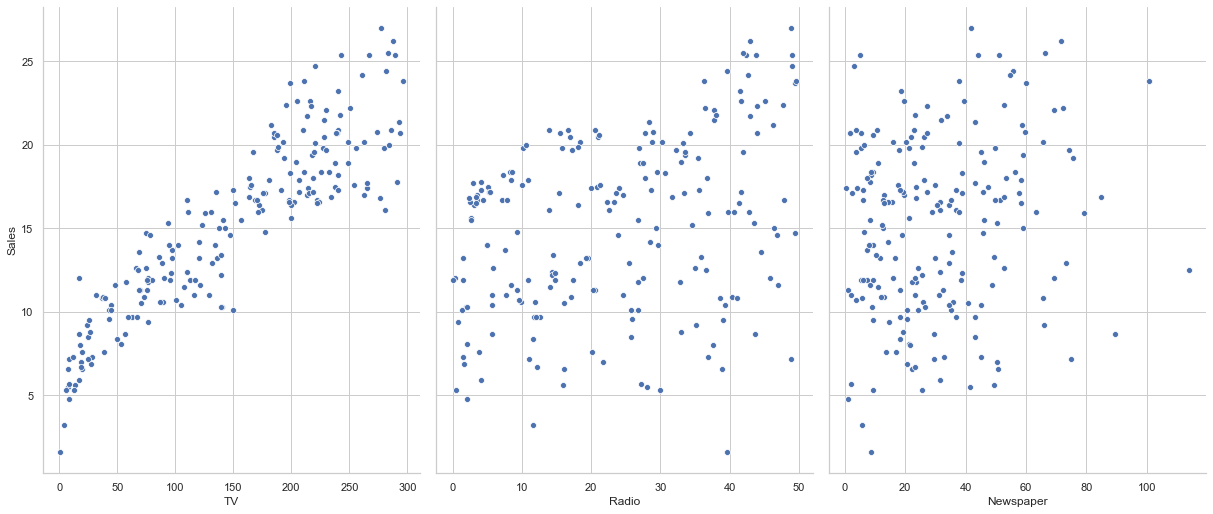

In [14]:
sns.pairplot(ds, x_vars= ['TV','Radio','Newspaper'], y_vars = 'Sales', height = 7, aspect=0.8)

#### Comments:

From Viz 2 and Viz 3 we can acqurie an elementary insight in the relationship between the dependent varible and the independent varibales. In Viz 3 we highlight on the graphs in the last row of Viz 2, this is where we see a postive prelimenary relationship between sales and TV and Radio advertisment. A verifiable and certain comment cannot be made on the correlation between sales and newspaper advertisment, and this realtionship shall be explored later.

#### Questions:
* Is there a relationship between ads and sales?
* How strong is that relationship?
* Which ad types contribute to sales?
* What is the effect of each ad type of sales?
* Given ad spending in a particular market, can sales be predicted?

#### Correlation Heat Map:

#### Viz 4

<AxesSubplot:>

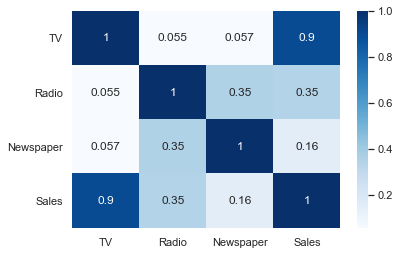

In [12]:
sns.heatmap(ds.corr(), annot=True, cmap='Blues')

#### Comment:

The heatmap above (Viz 4) displays the various correlations between the independent variables and the dependent variable, it can be concluded that all regrossors have a positive correlation with the regrassand. The strongest correlation is between sales and TV of 0.78 (1 being maximum for positive correlation). The weakest is between sales and newspaper, 0.23 (which is close to zero, which corresponds to a correlation fails to exist). 

This can be seen in again in Viz 5 below. The plot shows a regression plot of the independent varibale on Sales. We can conclude that the newspapers has the weakest existing linear relationship with Sales as its light blue band is the most dispersed and this signifies a weaker correlation, whereas TV shows the strongest correlation with tight and positvely directed regression plot.

#### Conclusion:

To answer the first question, we can conclude that there is a positive relationship between sales and adverts. The strenght of the relationship depends on the mode of advertisment. In ascending order of strenght of relationship TV has the strongest relationship followed by Radio and Newspapers.

#### Viz 5

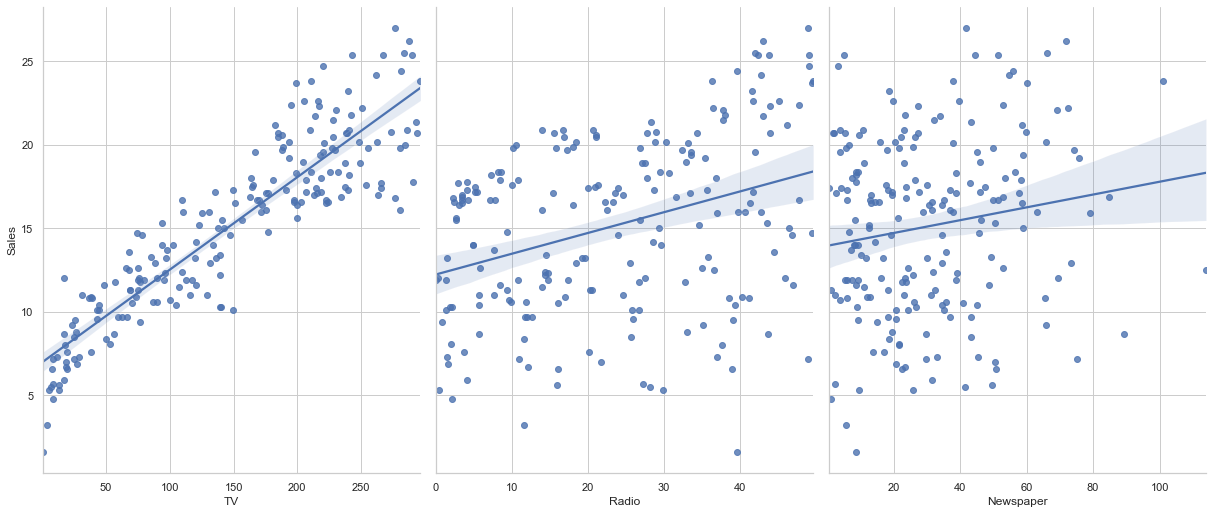

In [15]:
  sns.pairplot(ds, x_vars= ['TV','Radio','Newspaper'], y_vars = 'Sales', height =7, aspect=0.8, kind = 'reg')

## Regression Modelling

In [25]:
from sklearn.model_selection import train_test_split
X = ds[['Radio','TV','Newspaper']]
Y = ds[['Sales']]
X_test,X_train,Y_test,Y_train = train_test_split(X,Y,test_size=1/3,random_state = 0)


In [26]:
from sklearn.linear_model import LinearRegression
lmod = LinearRegression()
lmod.fit(X_train, Y_train)
lmod.score(X_train, Y_train)

0.8740240419112836

In [170]:
regme = pd.DataFrame(lmod.coef_.T,X.columns, columns=['Coefficient'])
print(regme)
print('\nIntercept:', lmod.intercept_)

           Coefficient
radio         0.166198
TV            0.047931
newspaper    -0.000855

Intercept: [3.04316527]


In [178]:
from sklearn import metrics

print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test, Y_hat))
print('Mean Squred Error is: ', metrics.mean_squared_error(Y_test, Y_hat))
print('R^2 is', metrics.r2_score(Y_test, Y_hat)*100, '%')

Mean Absolute Error is:  1.3771364777313488
Mean Squred Error is:  2.8700955992614445
R^2 is 89.4830141719851 %


#### Comments:

Post regression modelling, further information comes to light. The regression coefficients of TV and Radio predict a positive return in sales if advertisment is increased, whereas newspapers tend to display a negative effect on sales. The mean absolute error shows an average of 1.38 errors across the regression model, and a good and acceptable explainability of 89.5% as R^2.

In [182]:
import statsmodels.api as sm

In [241]:
X1 = sm.add_constant(X)
est = sm.OLS(Y, X1)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        16:48:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

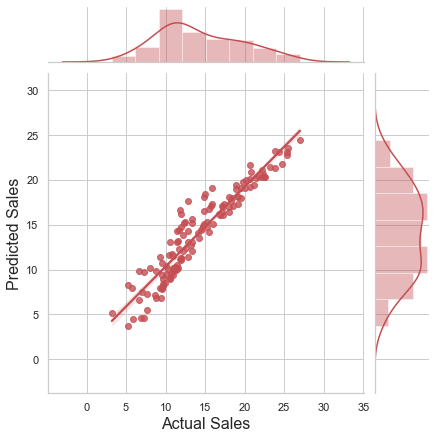

In [249]:
actpred = sns.jointplot(x=Y_test, y=Y_hat, kind="reg", color='r')
actpred.set_axis_labels('Actual Sales', 'Predicted Sales', fontsize=16)

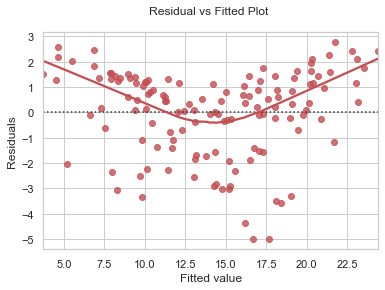

In [250]:
ax = sns.residplot(Y_hat,(Y_test-Y_hat), lowess = True, color = 'r')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n'); plt.show()

#### Comments:

In regression analysis the rule of thumb is: 

H0: There is no correlation between the independent and dependent varible.
H1: There is a relationship between independent and dependent varibales. 

In the current regression model it can be observed the that the p-values of TV and Radio are 0 zero, which is less than the significance level of 0.05, which means we can reject the null hypothesis as there is enough evidence of their statistical significance. 

However, the p-value of newspaper is 0.860 which makes it statistically insignificant and this must be omitted from the regression analysis. The R^2 that compliments the models explainability is 89.7% which is acceptable as it is a moderate score. To less corresponds to underfitting and too much corresponds to overfitting on training data.

Further, we can see in Viz 6 that there is right skew in the distribution of actual sales whereas the predicted sales follow a more normal and bimodal distribution.



## Regression Modelling Post Omittion Of Newspaper: 

In [231]:
X2 = ds[['radio','TV']]
Y2 = ds[['sales']]
X_test2,X_train2,Y_test2,Y_train2 = train_test_split(X2,Y2,test_size=1/3,random_state = 0)

In [234]:
lmod2 = LinearRegression()
lmod2.fit(X_train2,Y_train2)
Y_hat2 = lmod2.predict(X_test2)
print(Y_hat2)

[[16.9582527 ]
 [ 9.43154283]
 [11.23839138]
 [19.15926705]
 [10.27905428]
 [20.93437106]
 [23.24736132]
 [10.0907362 ]
 [16.20403861]
 [19.72599737]
 [18.25938789]
 [17.30441899]
 [18.17449405]
 [16.94103768]
 [ 8.96818196]
 [ 9.37704373]
 [ 5.47297447]
 [ 3.72343629]
 [17.06747214]
 [11.44992058]
 [18.01314846]
 [10.71075775]
 [13.05446154]
 [14.33906574]
 [ 7.15816684]
 [16.09802434]
 [10.17651913]
 [ 8.35647052]
 [16.6761035 ]
 [24.39764514]
 [ 9.84079227]
 [21.09897452]
 [14.00163793]
 [ 9.69679163]
 [ 8.43631006]
 [13.12154764]
 [20.31686441]
 [10.49532316]
 [15.21212267]
 [16.08810251]
 [16.39779867]
 [13.80469512]
 [17.04283193]
 [20.68870401]
 [ 8.17292865]
 [16.53698865]
 [15.33714838]
 [ 8.96151801]
 [13.06266   ]
 [16.77176966]
 [10.06498775]
 [13.12304355]
 [18.08443632]
 [20.29155842]
 [ 8.23629199]
 [20.12599282]
 [20.30544251]
 [14.40368965]
 [ 4.61243149]
 [17.12763238]
 [12.06961341]
 [11.08102632]
 [23.57697627]
 [11.21414091]
 [18.96228772]
 [20.3815431 ]
 [ 7.52171

In [240]:
regme2 = pd.DataFrame(lmod2.coef_.T,X2.columns, columns = ['Coefficient'])
print(regme2)

print('\n Intercept:', lmod2.intercept_)

       Coefficient
radio     0.165493
TV        0.047945

 Intercept: [3.02916328]


In [256]:
print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test2, Y_hat2))
print('Mean Squred Error is: ', metrics.mean_squared_error(Y_test2, Y_hat2))
print('R^2 is', metrics.r2_score(Y_test2, Y_hat2)*100, '%')

Mean Absolute Error is:  1.3790937562828067
Mean Squred Error is:  2.8759457261035455
R^2 is 89.4615773595297 %


In [248]:
X11 = sm.add_constant(X2)
est01 = sm.OLS(Y,X11)
est02 = est01.fit()
print(est02.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           4.83e-98
Time:                        16:53:04   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

In [ ]:
X1 = sm.add_constant(X)
est = sm.OLS(Y, X1)
est2 = est.fit()
print(est2.summary())

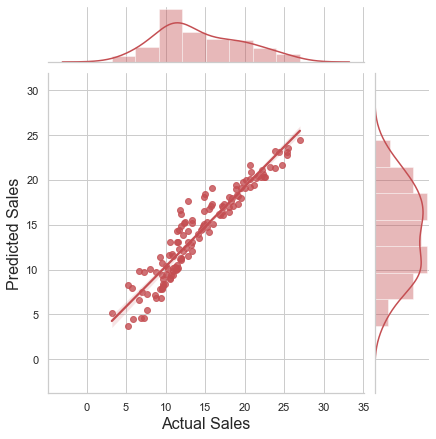

In [251]:
actpred1 = sns.jointplot(x=Y_test2, y=Y_hat2, kind="reg", color='r')
actpred1.set_axis_labels('Actual Sales', 'Predicted Sales', fontsize=16)

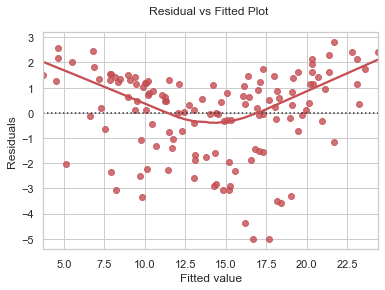

In [255]:
ax1 = sns.residplot(Y_hat2,(Y_test2-Y_hat2), lowess = True, color = 'r')
ax1.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n'); plt.show()

#### Comments:

The regression model after ommitting statistically insignificant varibale of newspaper does not show much of a difference in the model apart from a a few miniscule changes in the coefficients of the regressors. The post omittion regression also has a lower standard error on both variables which aids in further explainability. However, the R^2 had dropped but by only a decimal value, which can be explained by the dropping of a varibale. i.e. higher the number of variables the higher the R^2. Higher R^2 values can be corresponded to addition of variable that could lead to overfitting of data that dampens the effectiveness of linear predictive values.

#### Conclusion:
On a concluding note, it the EDA and Linear Modelling can attest to prevelant relationships in the dataset. There was a statistically insignificant variable which had to be dropped to enhance the model, and this was achieved. 

In [258]:
X_test

,radio,TV,newspaper
163,36.8,163.5,7.4
51,9.6,100.4,3.6
86,27.5,76.3,16.0
139,43.9,184.9,1.7
90,4.9,134.3,9.3
...,...,...,...
67,14.5,139.3,10.2
192,4.1,17.2,31.6
117,0.8,76.4,14.8
47,41.5,239.9,18.5


In [263]:
lmod.predict([[40,130,10]])

array([[15.91350843]])

In [264]:
def preding(x,y,z):
    return lmod.predict([[x,y,z]])

In [265]:
preding(40,130,10)

array([[15.91350843]])